In [29]:
import acquire_codeup
import prepare_codeup

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

import nltk.sentiment
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [6]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [8]:
# Create and explore bigrams for spam data visualize them wiht a word cloud

In [12]:
spam_words

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send a150 to rcv winner as a valued network customer you have been selected to receivea a900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030 six chances to win cash from 100 to 20000 pounds txt csh11 and send to 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent you have won a 1 week free membership in our a100000 prize jackpot txt the word claim to no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub to use your credit click the wap link in the next txt message or click here httpwap xxxmobilemovieclubcomnqj

In [16]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
.value_counts()
.head(20))

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

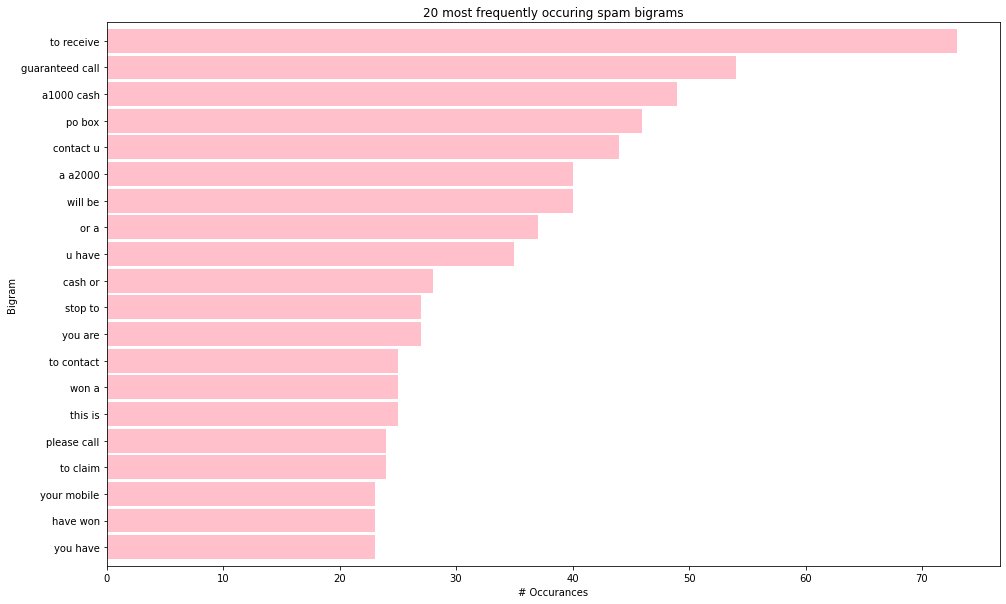

In [17]:
top_20_spam_bigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

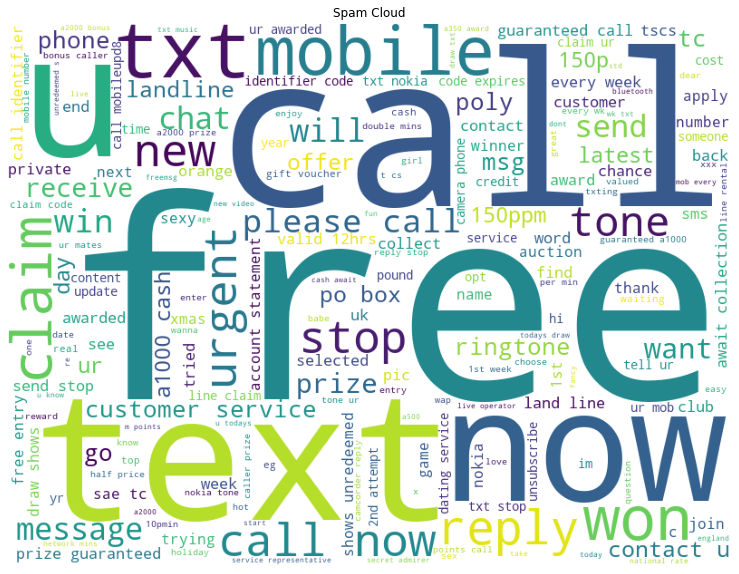

In [23]:
spam_cloud = WordCloud(background_color='white', height = 600, width = 800).generate(' '.join(spam_words.split()))

plt.figure(figsize = (16,10))
plt.title('Spam Cloud')
plt.imshow(spam_cloud)
plt.axis('off')
plt.show()


In [9]:
# Compared that to bigram of ham

In [24]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
.value_counts()
.head(20))

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(do, you)      91
dtype: int64

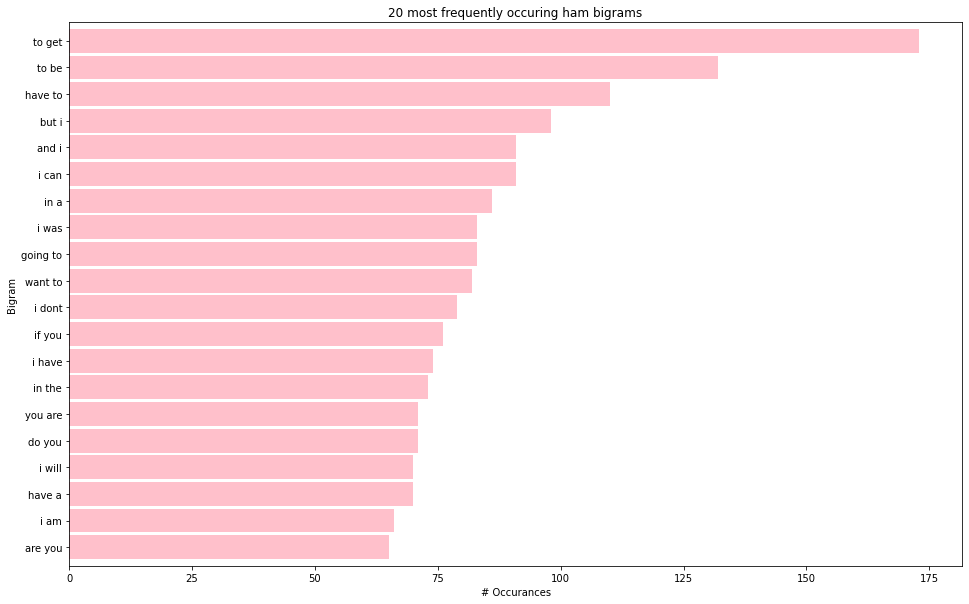

In [25]:
top_20_ham_bigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

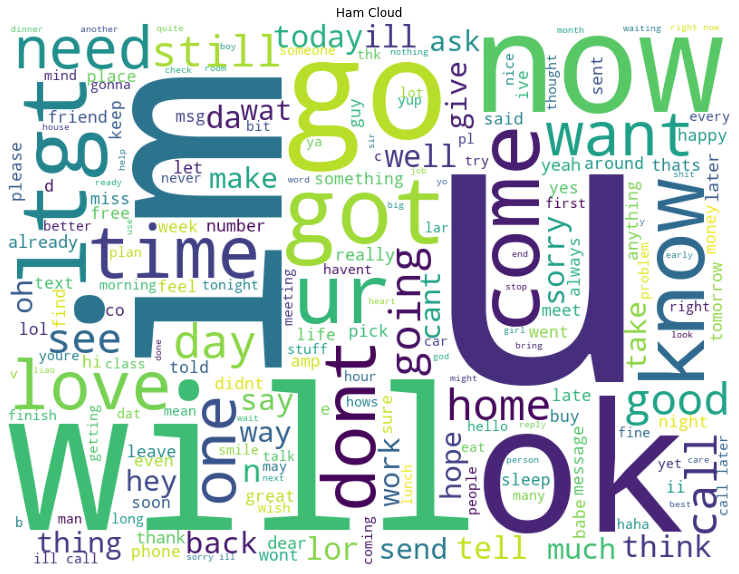

In [27]:
ham_cloud = WordCloud(background_color='white', height = 600, width = 800).generate(' '.join(ham_words.split()))

plt.figure(figsize = (16,10))
plt.title('Ham Cloud')
plt.imshow(ham_cloud)
plt.axis('off')
plt.show()

In [10]:
# any overlap in the bigrams for spam and ham?

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x720 with 0 Axes>

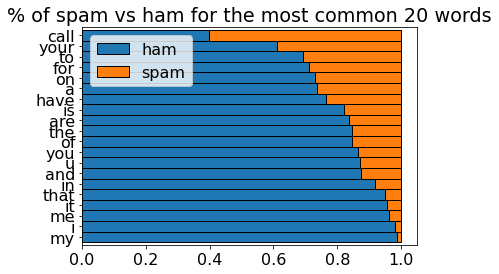

In [30]:
plt.figure(figsize=(16,10))
plt.rc('font', size = 16)

(word_counts.sort_values('all', ascending = False)
.head(20)
.apply(lambda row: row/row['all'], axis = 1)
.drop(columns = 'all')
.sort_values(by = 'spam')
.plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

In [ ]:
# create/ explore with trigrams( n-gram with an n of 3) for both spam and ham

In [31]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
.value_counts()
.head(20))

top_20_ham_trigrams.head()

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
dtype: int64

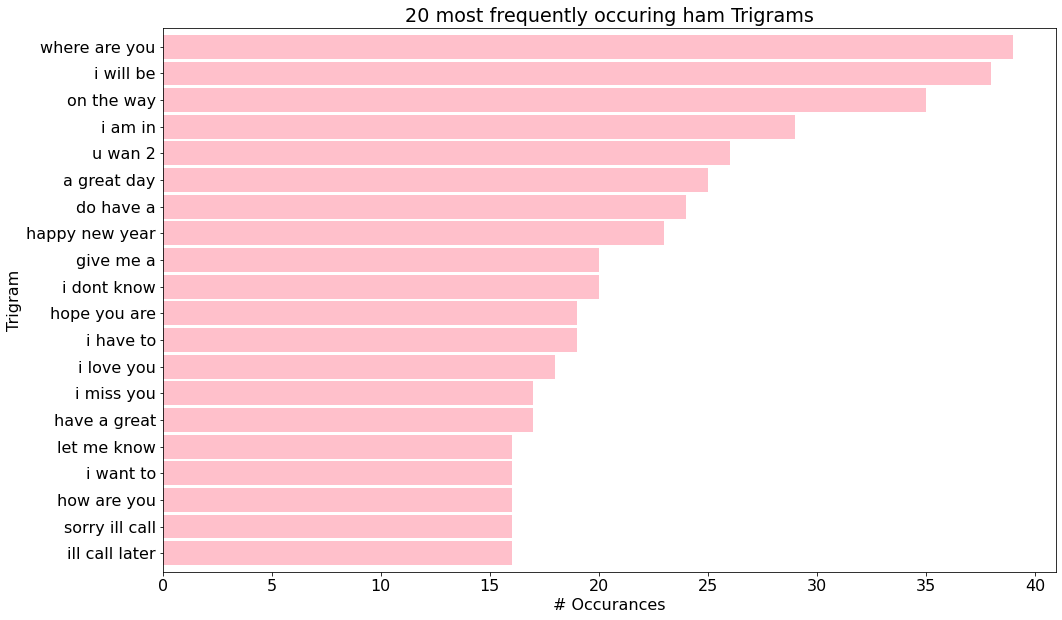

In [33]:
top_20_ham_trigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring ham Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

In [34]:
# now for tri spam

In [35]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
.value_counts()
.head(20))

top_20_spam_trigrams.head()

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(to, contact, u)             18
dtype: int64

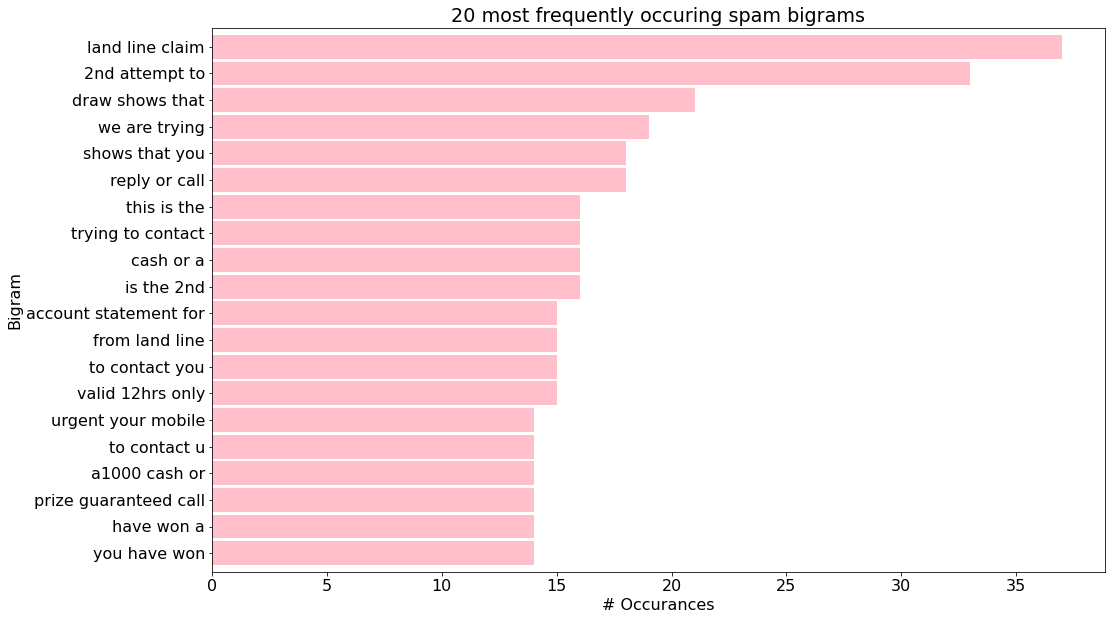

In [36]:
top_20_spam_trigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

In [37]:
# Using these techs to explore blog articles!

In [38]:
codeup_df = acquire_codeup.get_blog_articles()
codeup_df.head()

/Users/pj/Desktop/codeup-data-science/NLP-exercises/acquire_codeup.py:23: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 23 of the file /Users/pj/Desktop/codeup-data-science/NLP-exercises/acquire_codeup.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
/Users/pj/Desktop/codeup-data-science/NLP-exercises/acquire_codeup.py:33: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser an

,title,published,content
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are..."
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced..."
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma..."


In [39]:
all_words_codeup = clean(' '.join(codeup_df.content))

In [40]:
all_freq_codeup = pd.Series(all_words.split()).value_counts()

In [41]:
word_counts = pd.concat([all_freq_codeup], axis=1).fillna(0).astype(int)
word_counts.columns = ['all']
word_counts.head()

,all
i,2350
to,2240
you,2124
a,1431
the,1322


In [42]:
top_20_codeup_bigrams = (pd.Series(nltk.ngrams(all_words_codeup.split(), 2))
.value_counts()
.head(20))

top_20_codeup_bigrams.head()

(in, the)         28
(as, a)           25
(hired, at)       18
(san, antonio)    18
(of, the)         18
dtype: int64

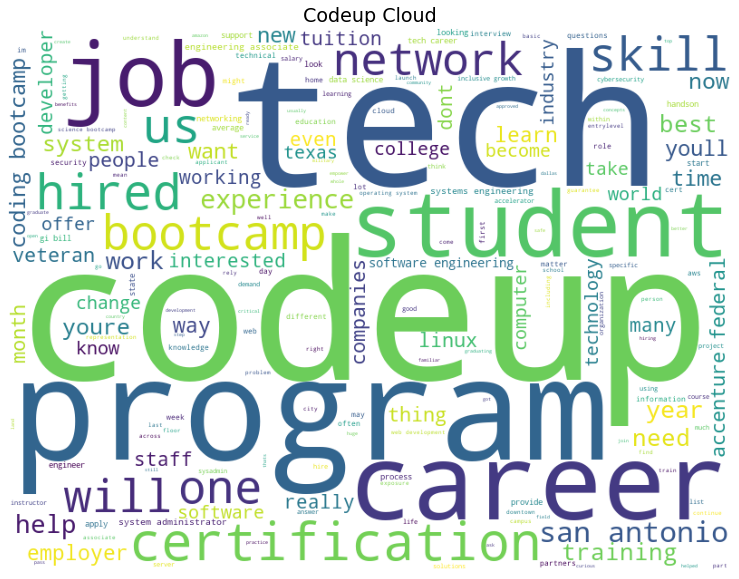

In [44]:
codeup_cloud = WordCloud(background_color='white', height = 600, width = 800).generate(' '.join(all_words_codeup.split()))

plt.figure(figsize = (16,10))
plt.title('Codeup Cloud')
plt.imshow(codeup_cloud)
plt.axis('off')
plt.show()

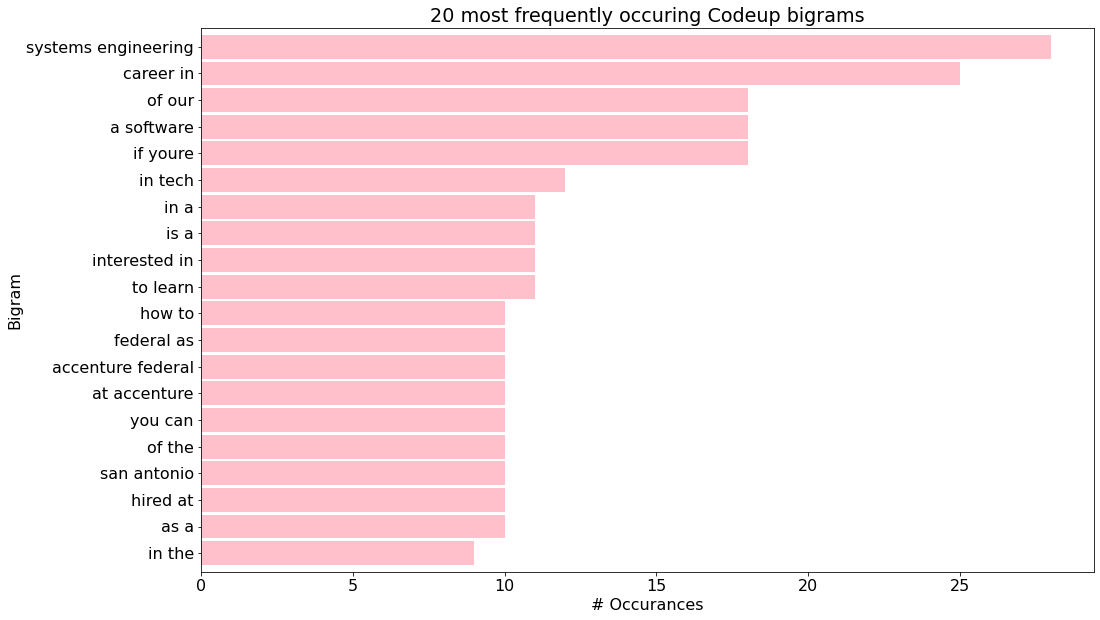

In [45]:
top_20_codeup_bigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring Codeup bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_codeup_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [46]:
# lets look at news articles!

In [3]:
news_df = acquire_codeup.get_inshorts_articles()
news_df.head()

/Users/pj/Desktop/codeup-data-science/NLP-exercises/acquire_codeup.py:68: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 68 of the file /Users/pj/Desktop/codeup-data-science/NLP-exercises/acquire_codeup.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


,title,author,content,date,category
0,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business
1,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business
3,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business
4,RBI examining if BharatPe violated corporate g...,Hiral Goyal,The Reserve Bank of India (RBI) is examining i...,"04 Feb 2022,Friday",business


In [4]:
news_df['category'].value_counts()

business         25
technology       25
sports           25
entertainment    25
Name: category, dtype: int64

In [5]:
# combine all messages in single string by label

business_words = clean(' '.join(news_df[news_df.category == 'business'].content))
technology_words = clean(' '.join(news_df[news_df.category == 'technology'].content))
sports_words = clean(' '.join(news_df[news_df.category == 'sports'].content))
entertainment_words = clean(' '.join(news_df[news_df.category == 'entertainment'].content))

all_words_news = clean(' '.join(news_df.content))

In [6]:
business_freq = pd.Series(business_words.split()).value_counts()
technology_freq = pd.Series(technology_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
entertainment_freq = pd.Series(entertainment_words.split()).value_counts()
all_freq = pd.Series(all_words_news.split()).value_counts()

In [7]:
# concat all frequencies together into a dataframe

word_counts_news = pd.concat([business_freq, technology_freq, sports_freq, entertainment_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts_news.columns = ['business', 'technology', 'sports', 'entertainment', 'all']
word_counts_news.head()

,business,technology,sports,entertainment,all
the,66,76,70,47,259
of,35,34,25,23,117
in,32,44,40,25,141
to,31,32,35,45,143
a,28,22,33,30,113


In [8]:
def get_gram(words, gram, top):
    top_gram = (pd.Series(nltk.ngrams(words.split(), gram))
    .value_counts()
    .head(top))
    
    return top_gram

In [9]:
top_20_business = get_gram(business_words, 2, 20)
top_20_business.head()

(in, the)       7
(for, the)      7
(said, that)    6
(on, the)       5
(of, the)       5
dtype: int64

In [10]:
top_20_technology = get_gram(technology_words, 2, 20)
top_20_technology.head()

(billion, in)      9
(on, thursday)     9
(market, value)    9
(in, the)          9
(for, the)         8
dtype: int64

In [11]:
top_20_sports = get_gram(sports_words, 2, 20)
top_20_sports.head()

(said, he)      8
(he, added)     7
(in, the)       7
(of, the)       6
(world, cup)    5
dtype: int64

In [12]:
top_20_entertainment = get_gram(entertainment_words, 2, 20)
top_20_entertainment.head()

(in, the)      6
(of, the)      5
(has, said)    5
(will, be)     5
(to, the)      5
dtype: int64

In [13]:
def get_cloud_image(words):
    cloud = WordCloud(background_color='white', 
                               height = 600, width = 800).generate(' '.join(words.split()))

    plt.figure(figsize = (16,10))
    plt.title('Cloud')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

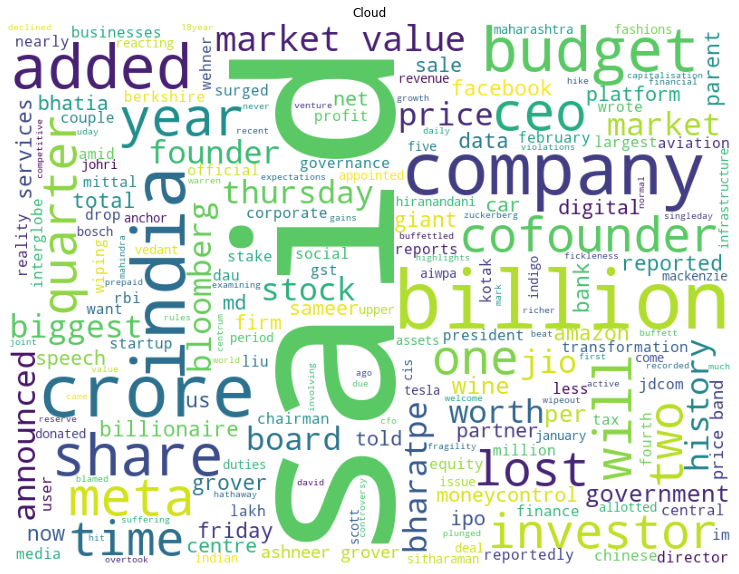

In [14]:
get_cloud_image(business_words)

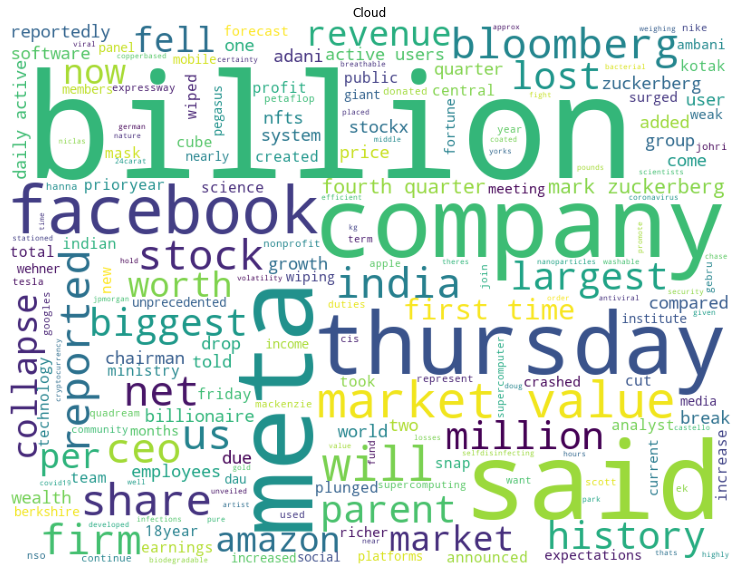

In [15]:
get_cloud_image(technology_words)

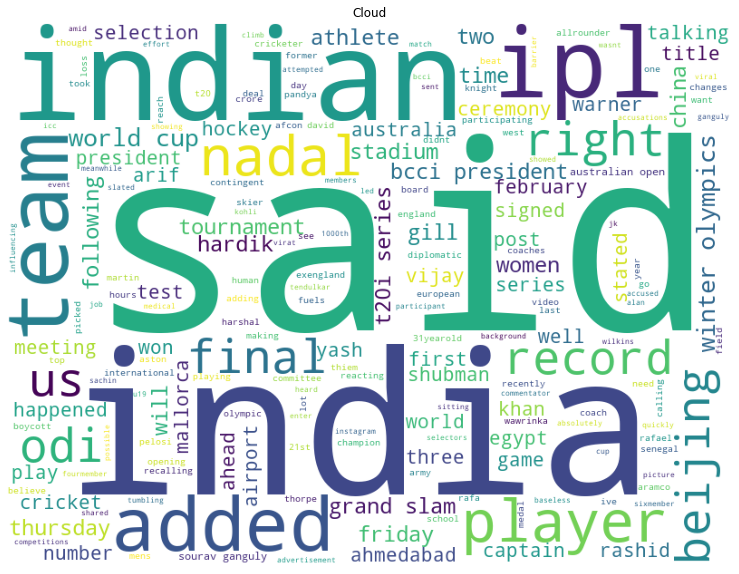

In [16]:
get_cloud_image(sports_words)

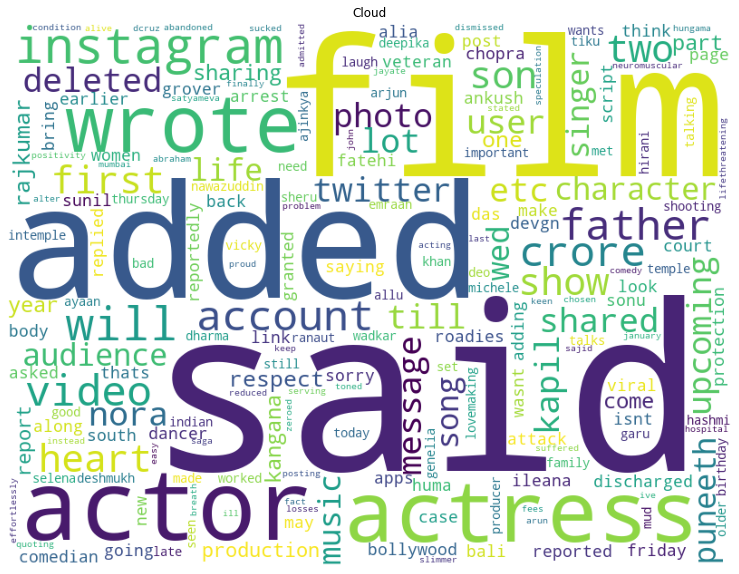

In [17]:
get_cloud_image(entertainment_words)

In [18]:
def get_gram_graph(gram):
    gram.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

    plt.title('20 most frequently occuring grams')
    plt.ylabel('Gram')
    plt.xlabel('# Occurances')

    ticks, _ = plt.yticks()
    labels = gram.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)

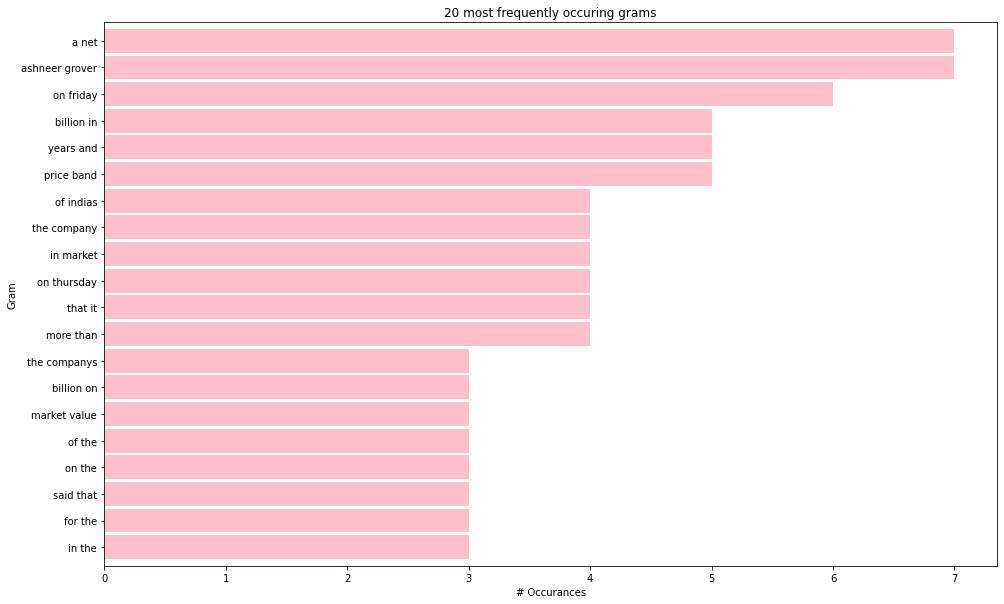

In [19]:
get_gram_graph(top_20_business)

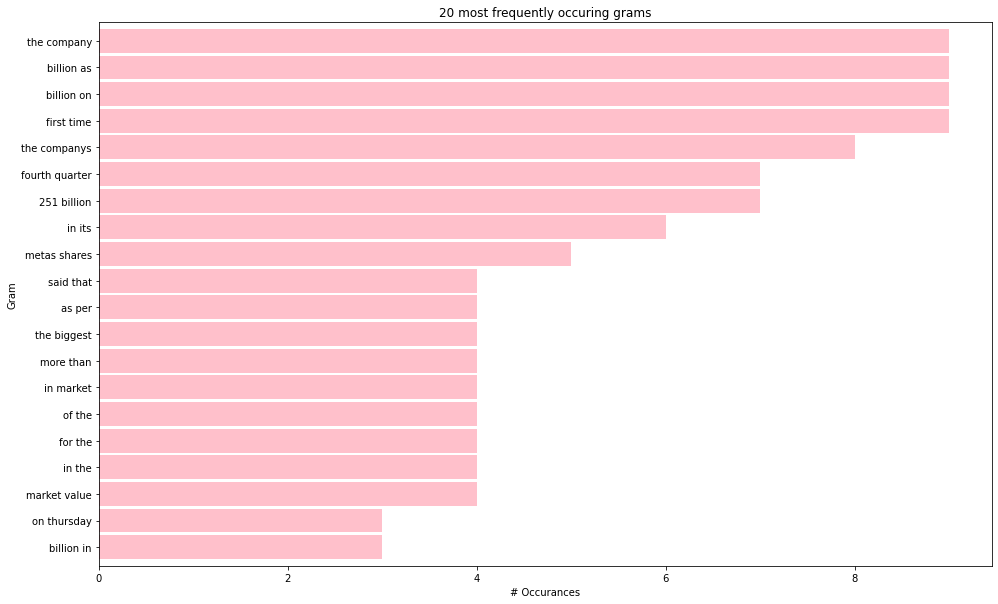

In [20]:
get_gram_graph(top_20_technology)

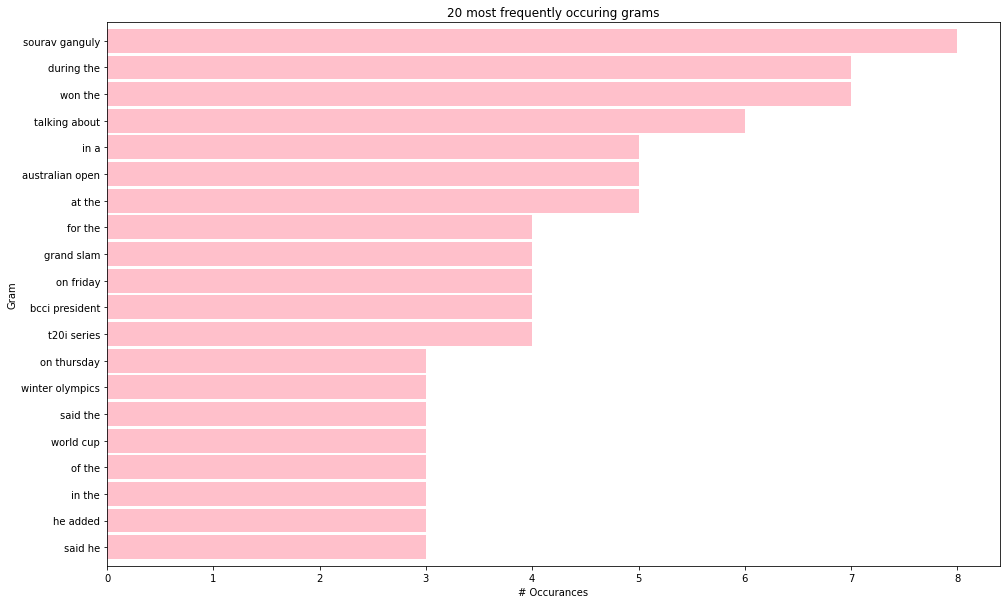

In [21]:
get_gram_graph(top_20_sports)

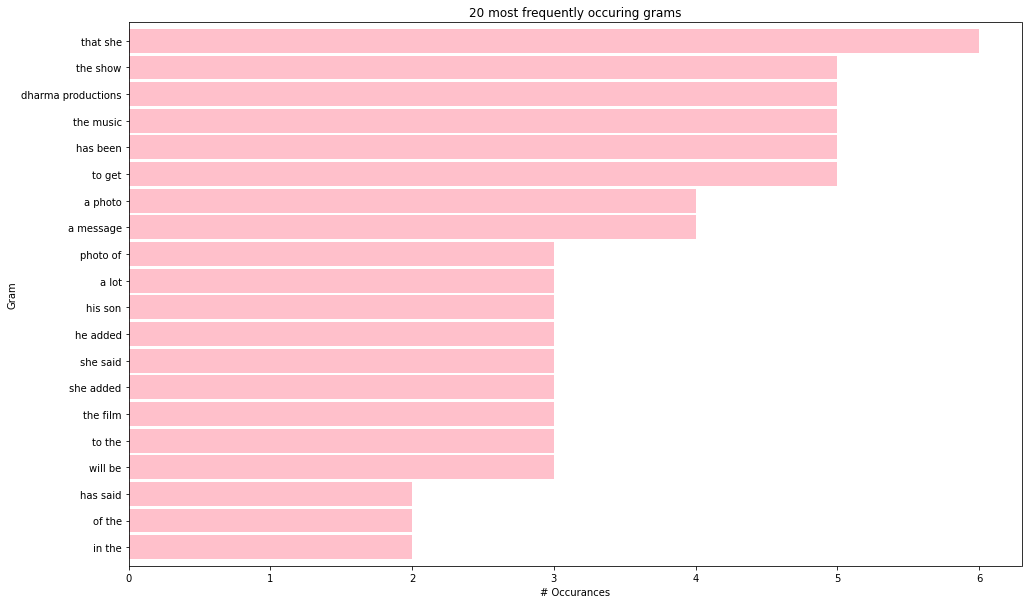

In [22]:
get_gram_graph(top_20_entertainment)

In [ ]:
# Other ways to explore:
# character count : df['character length'] df.content.apply(len)
# word count : df['word count'] df.content.apply(clean).apply(str.split).apply(len)
# sentence count
# stopword count
# unique word count
# punctuation count
# average word length
# average words per sentence
# word to stopword ratio

In [24]:
news_df.head()

,title,author,content,date,category
0,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business
1,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business
3,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business
4,RBI examining if BharatPe violated corporate g...,Hiral Goyal,The Reserve Bank of India (RBI) is examining i...,"04 Feb 2022,Friday",business


In [26]:
news_df['character_length'] = news_df.content.apply(len)
news_df['word_count'] = news_df.content.apply(clean).apply(str.split).apply(len)

news_df.head()

,title,author,content,date,category,character_length,word_count
0,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,386,60
1,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,350,60
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,330,60
3,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,324,53
4,RBI examining if BharatPe violated corporate g...,Hiral Goyal,The Reserve Bank of India (RBI) is examining i...,"04 Feb 2022,Friday",business,389,57


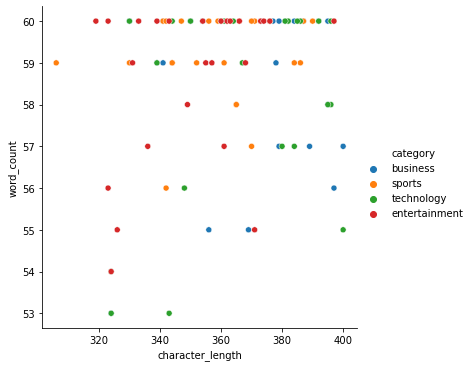

In [28]:
sns.relplot(data = news_df, x = 'character_length', y = 'word_count', hue = 'category')

In [33]:
# looking at sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [34]:
news_df['sentiment'] = news_df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
news_df.head()

,title,author,content,date,category,character_length,word_count,sentiment
0,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business,386,60,0.6597
1,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business,350,60,0.9136
2,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business,330,60,-0.0772
3,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business,324,53,0.3400
4,RBI examining if BharatPe violated corporate g...,Hiral Goyal,The Reserve Bank of India (RBI) is examining i...,"04 Feb 2022,Friday",business,389,57,-0.5267


In [35]:
news_df.groupby('category').sentiment.agg(['mean', 'median'])

,mean,median
category,,
business,0.247132,0.3400
entertainment,0.368176,0.5106
sports,0.261732,0.2023
technology,0.257228,0.4588


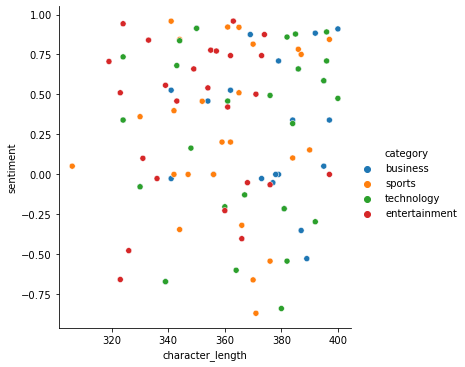

In [36]:
sns.relplot(data = news_df, x = 'character_length', y = 'sentiment', hue = 'category')

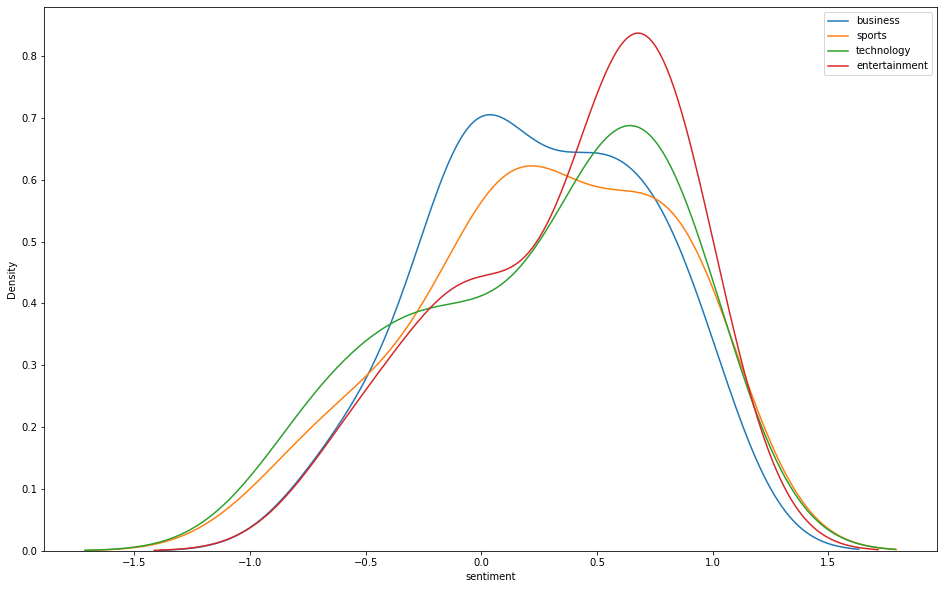

In [39]:
# is the distribution 
plt.figure(figsize = (16,10))
sns.kdeplot(news_df[news_df.category == 'business'].sentiment, label = 'business')
sns.kdeplot(news_df[news_df.category == 'sports'].sentiment, label = 'sports')
sns.kdeplot(news_df[news_df.category == 'technology'].sentiment, label = 'technology')
sns.kdeplot(news_df[news_df.category == 'entertainment'].sentiment, label = 'entertainment')
plt.legend(['business', 'sports', 'technology', 'entertainment'])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

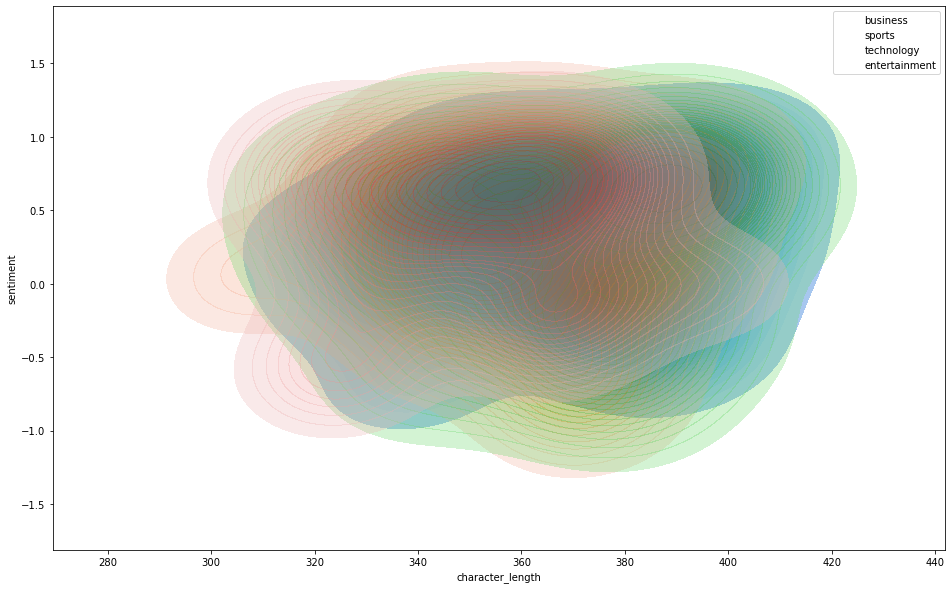

In [41]:
# is the distribution 
plt.figure(figsize = (16,10))
sns.kdeplot(news_df[news_df.category == 'business'].character_length, news_df[news_df.category == 'business'].sentiment, levels = 30, shade = True)
sns.kdeplot(news_df[news_df.category == 'sports'].character_length, news_df[news_df.category == 'sports'].sentiment, levels = 30, shade = True, alpha = 0.3)
sns.kdeplot(news_df[news_df.category == 'technology'].character_length, news_df[news_df.category == 'technology'].sentiment, levels = 30, shade = True, alpha = 0.3)
sns.kdeplot(news_df[news_df.category == 'entertainment'].character_length, news_df[news_df.category == 'entertainment'].sentiment, levels = 30, shade = True, alpha = 0.3)
plt.legend(['business', 'sports', 'technology', 'entertainment'])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='character_length', ylabel='sentiment'>

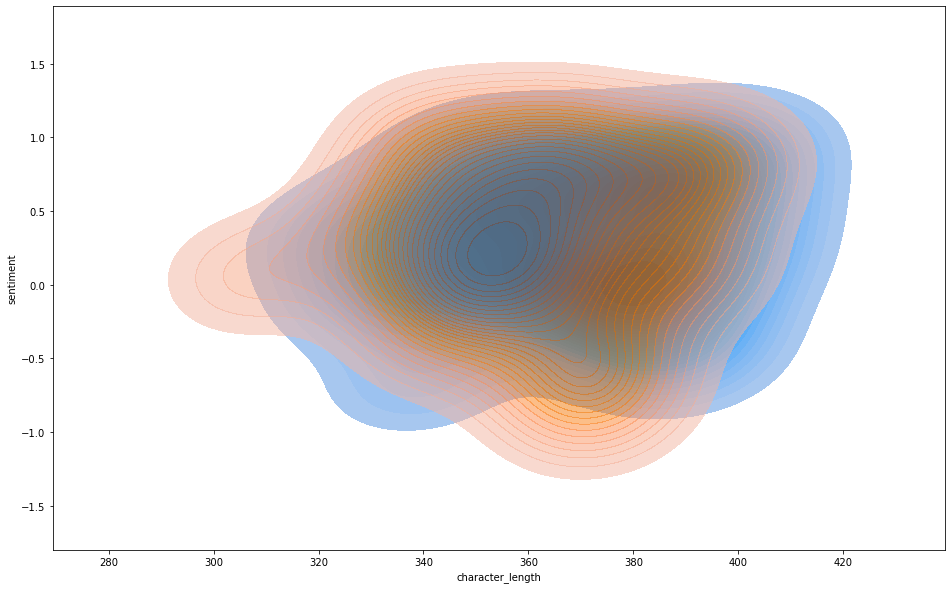

In [42]:
plt.figure(figsize = (16,10))
sns.kdeplot(news_df[news_df.category == 'business'].character_length, news_df[news_df.category == 'business'].sentiment, levels = 30, shade = True)
sns.kdeplot(news_df[news_df.category == 'sports'].character_length, news_df[news_df.category == 'sports'].sentiment, levels = 30, shade = True, alpha = 0.5)